In [ ]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#A bayesian simulation of how fair a coin is:
#Jeremy Kedziora
#4/20/2016
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [1]:
import numpy as np    #import numpy for the beta distribution
import matplotlib.pyplot as plt    #import to visualize and plot
import scipy.stats    #import to plot density

In [30]:
n = 3    #define the number of coin flips
x = 1    #define the number of heads

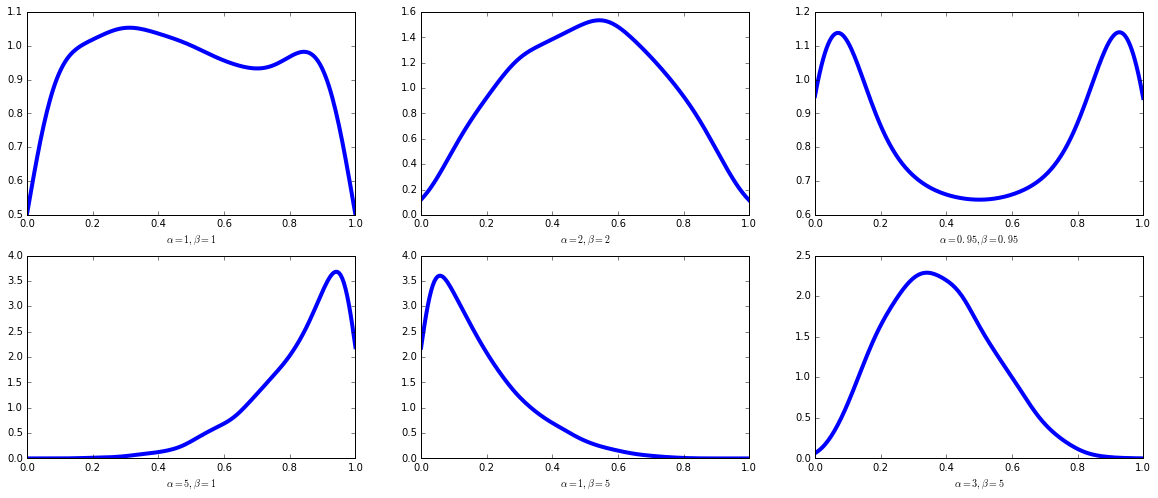

In [31]:
#what prior distribution should we use?  That is how should we choose alpha and beta?  Six examples:
%matplotlib inline

prior_1 = np.random.beta(1,1,10000)    #a prior with alpha = 1 and beta = 1
prior_2 = np.random.beta(2,2,10000)    #a prior with alpha = 2 and beta = 2
prior_3 = np.random.beta(0.5,0.5,10000)    #a prior with alpha = 0.5 and beta = 0.5
prior_4 = np.random.beta(5,1,10000)    #a prior with alpha = 5 and beta = 1
prior_5 = np.random.beta(1,5,10000)    #a prior with alpha = 1 and beta = 5
prior_6 = np.random.beta(3,5,10000)    #a prior with alpha = 3 and beta = 5

qs = np.linspace(0,1,200)    #set the x range

#compute the densities
d_1 = scipy.stats.gaussian_kde(prior_1)    #use the scipy density calculator
d_1.covariance_factor = lambda : .25    #set the covariance factor so that plots analogous to R's are plotted
d_1._compute_covariance()    #recompute using the new covariance factor

d_2 = scipy.stats.gaussian_kde(prior_2)    #use the scipy density calculator
d_2.covariance_factor = lambda : .25    #set the covariance factor so that plots analogous to R's are plotted
d_2._compute_covariance()    #recompute using the new covariance factor

d_3 = scipy.stats.gaussian_kde(prior_3)    #use the scipy density calculator
d_3.covariance_factor = lambda : .25    #set the covariance factor so that plots analogous to R's are plotted
d_3._compute_covariance()    #recompute using the new covariance factor

d_4 = scipy.stats.gaussian_kde(prior_4)    #use the scipy density calculator
d_4.covariance_factor = lambda : .25    #set the covariance factor so that plots analogous to R's are plotted
d_4._compute_covariance()    #recompute using the new covariance factor

d_5 = scipy.stats.gaussian_kde(prior_5)    #use the scipy density calculator
d_5.covariance_factor = lambda : .25    #set the covariance factor so that plots analogous to R's are plotted
d_5._compute_covariance()    #recompute using the new covariance factor

d_6 = scipy.stats.gaussian_kde(prior_6)    #use the scipy density calculator
d_6.covariance_factor = lambda : .25    #set the covariance factor so that plots analogous to R's are plotted
d_6._compute_covariance()    #recompute using the new covariance factor


plt.figure(figsize = (20,8))    #initiate the plot

plt.subplot(2,3,1)    #plot subplot 1,1 in the 2x3 area
plt.plot(qs,d_1(qs),'b-',lw=4)    #generate the plot
plt.xlabel(r'$\alpha = 1,\beta = 1$',fontsize=10)    #add an x label

plt.subplot(2,3,2)    #plot subplot 1,2 in the 2x3 area
plt.plot(qs,d_2(qs),'b-',lw=4)    #generate the plot
plt.xlabel(r'$\alpha = 2,\beta = 2$',fontsize=10)    #add an x label

plt.subplot(2,3,3)    #plot subplot 1,3 in the 2x3 area
plt.plot(qs,d_3(qs),'b-',lw=4)    #generate the plot
plt.xlabel(r'$\alpha = 0.95,\beta = 0.95$',fontsize=10)    #add an x label

plt.subplot(2,3,4)    #plot subplot 2,1 in the 2x3 area
plt.plot(qs,d_4(qs),'b-',lw=4)    #generate the plot
plt.xlabel(r'$\alpha = 5,\beta = 1$',fontsize=10)    #add an x label

plt.subplot(2,3,5)    #plot subplot 2,2 in the 2x3 area
plt.plot(qs,d_5(qs),'b-',lw=4)    #generate the plot
plt.xlabel(r'$\alpha = 1,\beta = 5$',fontsize=10)    #add an x label

plt.subplot(2,3,6)    #plot subplot 2,3 in the 2x3 area
plt.plot(qs,d_6(qs),'b-',lw=4)    #generate the plot
plt.xlabel(r'$\alpha = 3,\beta = 5$',fontsize=10)    #add an x label

plt.show()    #and then show the plot

In [32]:
#let's go with a distribution that maximizes prior uncertainty
def sampler(n,x,nsim,alpha=1.0,beta=1.0):
    """A function to estimate the posterior distribution over the probability of heads.
    Takes as inputs:
        n: the number of flips
        x: the number of successes
        alpha: a prior parameter for the beta distribution
        beta: a prior parameter for the beta distribution
    Return nsim samples from the posterior distribution."""
    return np.random.beta(x + alpha - 1,n + beta - (x + 1),nsim)    #draw from the posterior distribution that we derived

posterior_sample = sampler(n,x,10000,0.95,0.95)    #create the posterior sample of q

In [33]:
posterior_sample

array([ 0.05230961,  0.3158556 ,  0.24164968, ...,  0.1809539 ,
        0.51130963,  0.48329604])

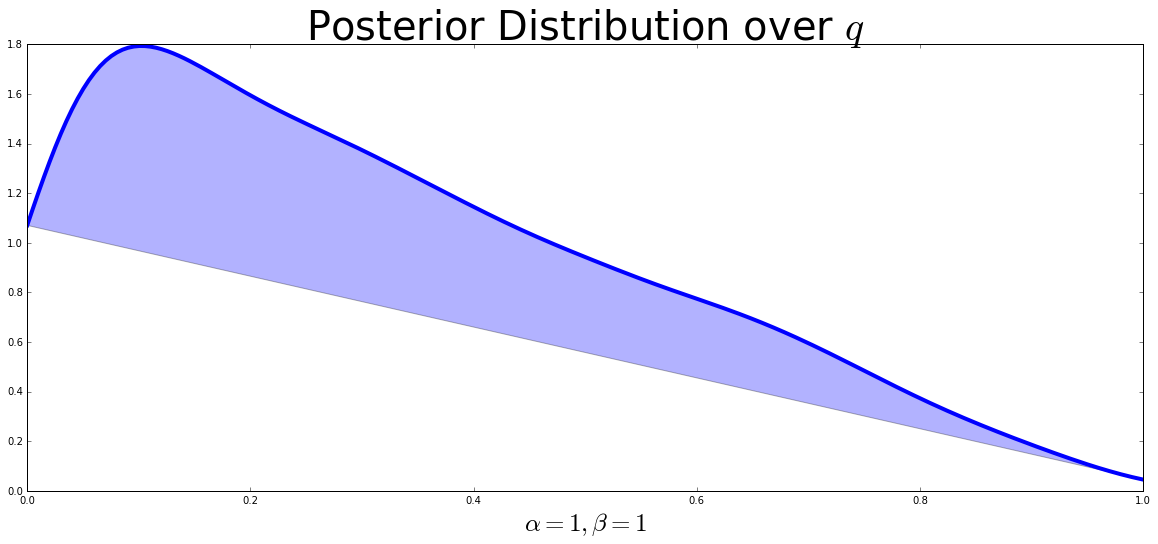

In [34]:
#let's visualize the posterior we have constructed:
%matplotlib inline

qs = np.linspace(0,1,200)    #set the x range

#compute the densities
q = scipy.stats.gaussian_kde(posterior_sample)    #use the scipy density calculator
q.covariance_factor = lambda : .25    #set the covariance factor so that plots analogous to R's are plotted
q._compute_covariance()    #recompute using the new covariance factor

plt.figure(figsize = (20,8))    #initiate the plot
plt.plot(qs,q(qs),'b-',lw=4)    #generate the plot
plt.fill(qs,q(qs),'b',alpha=0.3)    #fill in the curves
plt.xlabel(r'$\alpha = 1,\beta = 1$',fontsize=25)    #add an x label
plt.title(r'Posterior Distribution over $q$',fontsize=40)    #add a title to the plot


In [14]:
#Can we summarize this distribution?
#1) What is a point estimate of q?
print('The mean value of q is:',np.mean(posterior_sample))

#2) What about the 95% region?
print('The 95% Region is: [',np.percentile(posterior_sample,q=2.5),',',np.percentile(posterior_sample,q=97.5),']')

#3) What is the probability that the coin is biased in favor of heads?
print('The probability that the coin favors heads is:',sum(posterior_sample > 0.5)/len(posterior_sample))

#4) And the probability that the coin favors tails is?
print('The probability that the coin favors tails is:',sum(posterior_sample < 0.5)/len(posterior_sample))

The mean value of q is: 0.399969147211
The 95% Region is: [ 0.382467561585 , 0.417522151808 ]
The probability that the coin favors heads is: 0.0
The probability that the coin favors tails is: 1.0
